### 1.Load Libraries & Dataset

In [1]:
#libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#data pre-processing
veri = pd.read_csv('houseprice.csv')

In [3]:
veri.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [4]:
veri.corr()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
No,1.000000,-0.048658,-0.032808,-0.013573,-0.012699,-0.010110,-0.011059,-0.028587
X1 transaction date,-0.048658,1.000000,0.017549,0.060880,0.009635,0.035058,-0.041082,0.087491
X2 house age,-0.032808,0.017549,1.000000,0.025622,0.049593,0.054420,-0.048520,-0.210567
X3 distance to the nearest MRT station,-0.013573,0.060880,0.025622,1.000000,-0.602519,-0.591067,-0.806317,-0.673613
X4 number of convenience stores,-0.012699,0.009635,0.049593,-0.602519,1.000000,0.444143,0.449099,0.571005
X5 latitude,-0.010110,0.035058,0.054420,-0.591067,0.444143,1.000000,0.412924,0.546307
X6 longitude,-0.011059,-0.041082,-0.048520,-0.806317,0.449099,0.412924,1.000000,0.523287
Y house price of unit area,-0.028587,0.087491,-0.210567,-0.673613,0.571005,0.546307,0.523287,1.000000


In [5]:
veri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [6]:
veri

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


In [7]:
#rename columns
veri.drop(["No"], axis=1, inplace=True) #no contribution to reegression
veri.rename(columns={"X1 transaction date": "date", "X2 house age": "age","X3 distance to the nearest MRT station":"station distance",
                    "X4 number of convenience stores":"stores","X5 latitude":"lat","X6 longitude":"long","Y house price of unit area":"house price" },inplace=True)
veri

,date,age,station distance,stores,lat,long,house price
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...
409,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


In [8]:
#separate independent values
x=veri[["date","age","station distance","stores","lat","long"]]
x

,date,age,station distance,stores,lat,long
0,2012.917,32.0,84.87882,10,24.98298,121.54024
1,2012.917,19.5,306.59470,9,24.98034,121.53951
2,2013.583,13.3,561.98450,5,24.98746,121.54391
3,2013.500,13.3,561.98450,5,24.98746,121.54391
4,2012.833,5.0,390.56840,5,24.97937,121.54245
...,...,...,...,...,...,...
409,2013.000,13.7,4082.01500,0,24.94155,121.50381
410,2012.667,5.6,90.45606,9,24.97433,121.54310
411,2013.250,18.8,390.96960,7,24.97923,121.53986
412,2013.000,8.1,104.81010,5,24.96674,121.54067


In [9]:
#dependent value/ prediction
y=veri[["house price"]]
y

,house price
0,37.9
1,42.2
2,47.3
3,54.8
4,43.1
...,...
409,15.4
410,50.0
411,40.6
412,52.5


### 2. Build a Model

In [10]:
#Model Building
from sklearn.model_selection import train_test_split

In [11]:
# Divide Data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=0)

In [12]:
#Learning
x_train

,date,age,station distance,stores,lat,long
302,2013.500,16.5,2288.01100,3,24.95885,121.51359
20,2013.417,4.5,2275.87700,3,24.96314,121.51151
303,2013.500,38.3,439.71050,0,24.97161,121.53423
142,2013.417,19.8,640.60710,5,24.97017,121.54647
14,2013.500,13.2,1164.83800,4,24.99156,121.53406
...,...,...,...,...,...,...
323,2013.417,28.6,197.13380,6,24.97631,121.54436
192,2013.167,43.8,57.58945,7,24.96750,121.54069
117,2013.000,13.6,4197.34900,0,24.93885,121.50383
47,2013.583,35.9,640.73910,3,24.97563,121.53715


In [13]:
x_test

,date,age,station distance,stores,lat,long
356,2012.833,10.3,211.4473,1,24.97417,121.52999
170,2013.333,24.0,4527.6870,0,24.94741,121.49628
224,2013.333,34.5,324.9419,6,24.97814,121.54170
331,2013.333,25.6,4519.6900,0,24.94826,121.49587
306,2013.500,14.4,169.9803,1,24.97369,121.52979
...,...,...,...,...,...,...
308,2013.417,16.4,289.3248,5,24.98203,121.54348
100,2013.500,17.5,964.7496,4,24.98872,121.53411
7,2013.417,20.3,287.6025,6,24.98042,121.54228
22,2012.917,14.7,1360.1390,1,24.95204,121.54842


In [14]:
#Controling
y_train

,house price
302,23.2
20,29.3
303,38.4
142,37.5
14,34.3
...,...
323,42.5
192,42.7
117,13.0
47,61.5


In [15]:
y_test

,house price
356,45.3
170,14.4
224,46.0
331,15.6
306,50.2
...,...
308,53.0
100,38.2
7,46.7
22,24.6


In [16]:
from sklearn.linear_model import LinearRegression 
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
#prediction
tahmin=lr.predict(x_test)
tahmin

array([[40.09548022],
       [12.83819172],
       [42.00966923],
       [12.64733002],
       [42.44343803],
       [39.83198984],
       [40.55595745],
       [33.86023762],
       [49.37328265],
       [45.87031976],
       [45.86310332],
       [40.64517161],
       [39.50676203],
       [40.04955455],
       [47.11860745],
       [38.13995857],
       [40.08417262],
       [41.12540438],
       [40.83964717],
       [42.37860913],
       [49.70003677],
       [31.08231285],
       [39.67622569],
       [45.52764709],
       [46.18872415],
       [43.43143246],
       [46.35880414],
       [26.20749681],
       [48.13688227],
       [21.53997799],
       [44.8104349 ],
       [34.94131598],
       [42.6644548 ],
       [38.37379621],
       [43.98018394],
       [32.28477958],
       [47.62406077],
       [39.77407301],
       [52.55712201],
       [ 7.46443039],
       [52.54110472],
       [33.1285138 ],
       [34.22107416],
       [49.59242876],
       [15.37567885],
       [43

In [18]:
#real data
y_test

,house price
356,45.3
170,14.4
224,46.0
331,15.6
306,50.2
...,...
308,53.0
100,38.2
7,46.7
22,24.6


In [19]:
#coefficient
print ('Coefficients: \n',lr.intercept_)
print ('Coefficients: \n',lr.coef_)

Coefficients: 
 [-14866.72182856]
Coefficients: 
 [[ 5.02037302e+00 -2.63132611e-01 -4.46345490e-03  1.09258054e+00
   2.25488903e+02 -6.80648392e+00]]


In [20]:
df=lr.score(x_test,y_test)
print(df)
dff=lr.score(x_train,y_train)
print(dff)

0.6573242742217569
0.5648053492261372


### 3. Visualisation

In [21]:
import seaborn as sb

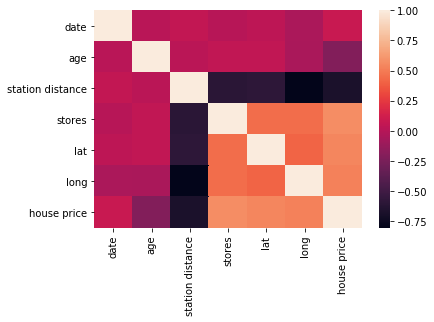

In [22]:
corr =veri.corr()
sb.heatmap(corr)

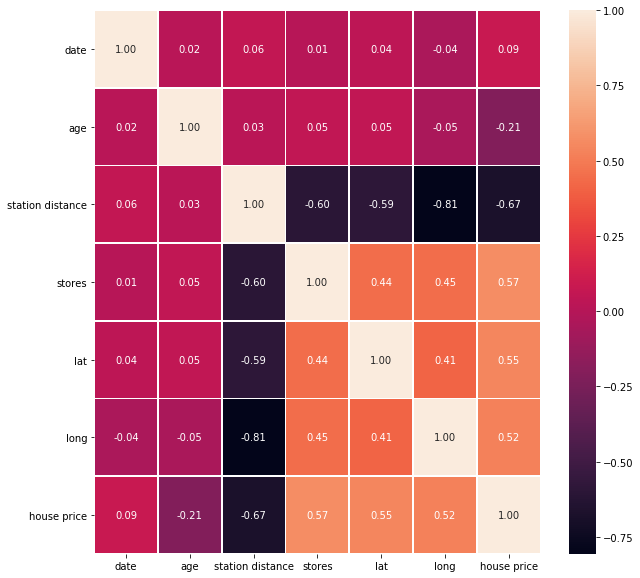

In [23]:
f,ax = plt.subplots(figsize=(10, 10))
sb.heatmap(veri.corr(), annot=True, linewidths=.9, fmt= '.2f',ax=ax)
plt.show()

In [24]:
#sort randomly seperated datasets
y_train=y_train.sort_index()
y_train

,house price
0,37.9
2,47.3
3,54.8
8,18.8
9,22.1
...,...
408,28.1
409,15.4
410,50.0
411,40.6


In [25]:
x_test=x_test.sort_index()
x_test

,date,age,station distance,stores,lat,long
1,2012.917,19.5,306.59470,9,24.98034,121.53951
4,2012.833,5.0,390.56840,5,24.97937,121.54245
5,2012.667,7.1,2175.03000,3,24.96305,121.51254
6,2012.667,34.5,623.47310,7,24.97933,121.53642
7,2013.417,20.3,287.60250,6,24.98042,121.54228
...,...,...,...,...,...,...
371,2013.500,4.1,312.89630,5,24.95591,121.53956
374,2013.250,5.4,390.56840,5,24.97937,121.54245
384,2012.750,16.1,4066.58700,0,24.94297,121.50342
402,2012.833,12.7,187.48230,1,24.97388,121.52981


Text(0, 0.5, 'House Price')

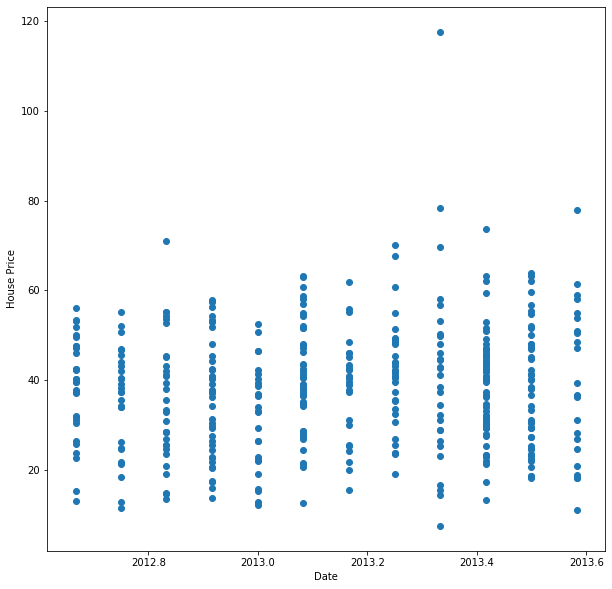

In [26]:
plt.figure(figsize=(10,10))
plt.scatter(veri["date"],veri["house price"])
plt.xlabel("Date")
plt.ylabel("House Price")

Text(0, 0.5, 'House Price')

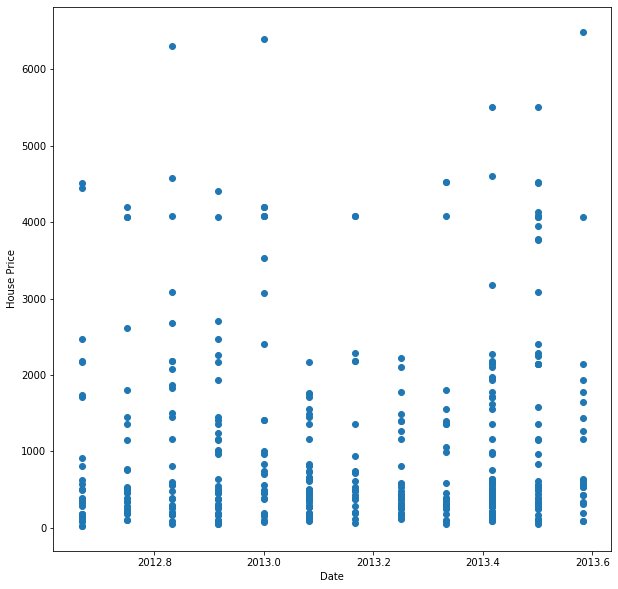

In [27]:
plt.figure(figsize=(10,10))
plt.scatter(veri["date"],veri["station distance"])
plt.xlabel("Date")
plt.ylabel("House Price")